<a href="https://colab.research.google.com/github/Yaswanth332/netflix-movie-analysis/blob/main/house_price_predictin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df=pd.read_csv("/content/AmesHousing.csv")

In [19]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [23]:
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [24]:
df.shape

(2930, 82)

In [27]:
df.dropna(thresh=len(df)*0.8,axis=1,inplace=True)

In [28]:
df.shape

(2930, 76)

In [30]:
for i in df.columns:
  if df[i].dtype == "object":
    df[i].fillna(df[i].mode()[0],inplace=True)
  else:
    df[i].fillna(df[i].median(),inplace=True)

<ipython-input-30-2783055970>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)
<ipython-input-30-2783055970>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [32]:
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [34]:
label_encoders={}
for col in df.select_dtypes(include="object"):
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]=le


In [37]:
x=df.drop(["SalePrice"],axis=1)

In [38]:
y=df.SalePrice

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
model=LinearRegression()


In [43]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=model.predict(X_test)

In [47]:
print("r2Score ",r2_score(y_test,y_pred))

r2Score  0.8615096167970782


In [48]:
print("mse :" ,mean_squared_error(y_test,y_pred))

mse : 1110353285.2992089


In [49]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

33321.96400723116


<ipython-input-56-2920493290>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


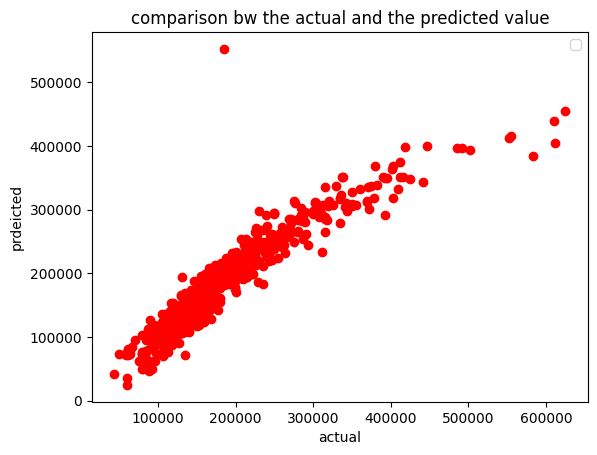

In [56]:
plt.scatter(y_test,y_pred,color="red")
plt.title("comparison bw the actual and the predicted value")
plt.xlabel("actual")
plt.ylabel("prdeicted")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-57-3060812739>, line 1)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print("random Forest r3=2 score :",r2_score(y_test,y_pred_rf))
print("Rndom Forest RMse:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

random Forest r3=2 score : 0.911363378055852
Rndom Forest RMse: 26657.988762675952


In [60]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)

In [61]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred_xgb=xgb.predict(X_test)

In [66]:

print("xgb regressor r3=2 score :",r2_score(y_test,y_pred_xgb))
print("xgb regressor",np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

xgb regressor r3=2 score : 0.9324450492858887
xgb regressor 23272.841511083258


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
}

grid = GridSearchCV(estimator=XGBRegressor(random_state=42),
                    param_grid=param_grid,
                    cv=3,
                    scoring='neg_mean_squared_error',
                    verbose=1)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned XGBoost R² Score:", r2_score(y_test, y_pred_best))
print("Tuned XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Tuned XGBoost R² Score: 0.9315063953399658
Tuned XGBoost RMSE: 23433.960996809736
